This is an Exploratory Data Analysis Deliverable for Week 2 -  Data Glacier

Installing and Importing needed libraries


In [78]:


# import numpy as np


%pip install statsmodels.api
#pandas
#matplot



#python -m pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodels.api (from versions: none)
ERROR: No matching distribution found for statsmodels.api

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Loading datasets
There are 4 individual data sets in this EDA. We are interested in studying the features in these datasets so below are all the EDA performed on learning about the variables in data.

In [2]:
# Datasets
import pandas as pd

## import first data as

Cab = pd.read_csv('./Cab_Data.csv')

City = pd.read_csv('./City.csv')

Customer = pd.read_csv('./Customer_ID.csv')

Transact = pd.read_csv('./Transaction_ID.csv')


In [3]:

import seaborn as sns
import matplotlib.pyplot as plt

## Look at the datasets



## Overview of data structure and dimensions
## data type and number of observations and columns

print(Cab.info())
print(City.info())
print(Customer.info())
print(Transact.info())


## lets take a look at the head of the data
print(Cab.head()) #cab data
print(City.head()) # city 
print(Customer.head()) # customer ID
print(Transact.head()) # transaction ID



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 

In [30]:


## check for missing values
print(Cab.isnull().sum())

print(City.isnull().sum())

print(Customer.isnull().sum())

print(Transact.isnull().sum())

## there are no missing values in these individual datasets

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64
City          0
Population    0
Users         0
dtype: int64
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


Lets Visualize the relationships between variables

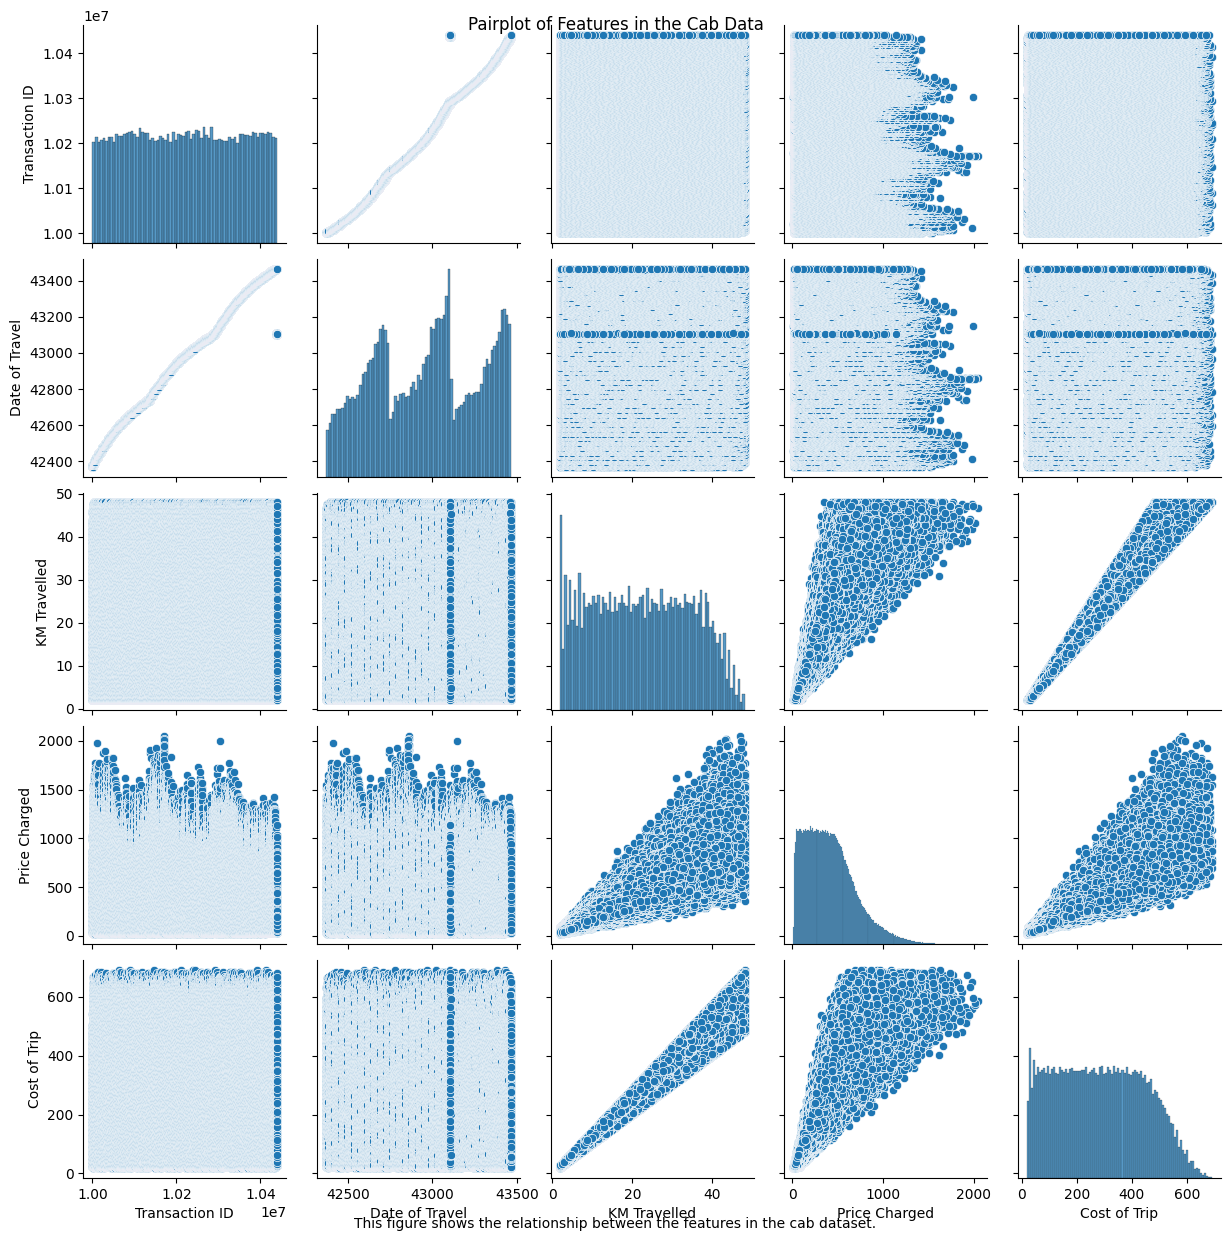

In [17]:
## lets look at some relationships between some interesting features

pairplot = sns.pairplot(Cab)

## add title
pairplot.fig.suptitle("Pairplot of Features")

## add caption
caption = "This figure shows the relationship between the features in the cab dataset."
plt.figtext(0.5,0.01, caption, wrap = True, horizontalalignment = 'center', fontsize = 15)

## display plot
plt.show()

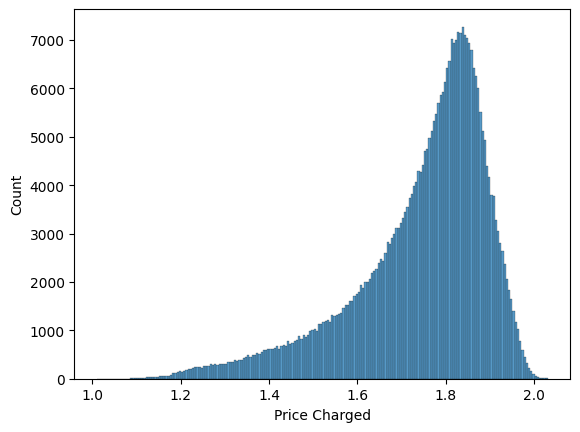

In [44]:

import numpy as np
## check distributions

Hist = sns.histplot(Cab['Price Charged'])


#Hist.fig.suptitle("Distribution of the Price Charged")

## this is right skwed and we need to normalize it 

## we need to normalize the price variable to be able to run the analysis

#Cab['Price Charged'] = np.log(Cab['Price Charged'])

#sns.histplot(Cab['Price Charged'])

plt.show()

In preprocessing the data to perform the statistical analysis in the form of hypotheses testing,

1. Checked the variable types and common variables in all 4 datasets
2. I used the merge data function to join data based on a common feature
3. I created a master data called invest.cab

For the purposed of this analysis, I decided to join all the 4 different files as one because the were common features shared accross the files. I started with joining the cab and city data as one, joined this new data with the transaction Id data and finally join the new data with the customer Id data. Below is the procedure

In [11]:
## Joining datasets

# 1. Join cab data and city data by city
cab_invest = pd.merge(Cab, City, on="City", suffixes=("_Population", "_Users"))

## check new data
cab_invest.info()

# 2. Join cab_invest with transact data
CabInvest = pd.merge(cab_invest, Transact, on="Transaction ID",suffixes=("Customer ID", "Payment_Mode"))
CabInvest.info()


# 3. Join cab_invest with Custom data to create master data
investcab = pd.merge(CabInvest, Customer, on="Customer ID", suffixes=("Gender", "Age"))
investcab.info()

convert = {"Gender": {"Male":1, "Female": 0}}

investcab = investcab.replace(convert)


## Now we have the master data
## lets perform some visualizations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Population      359392 non-null  object 
 8   Users           359392 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 24.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         35939

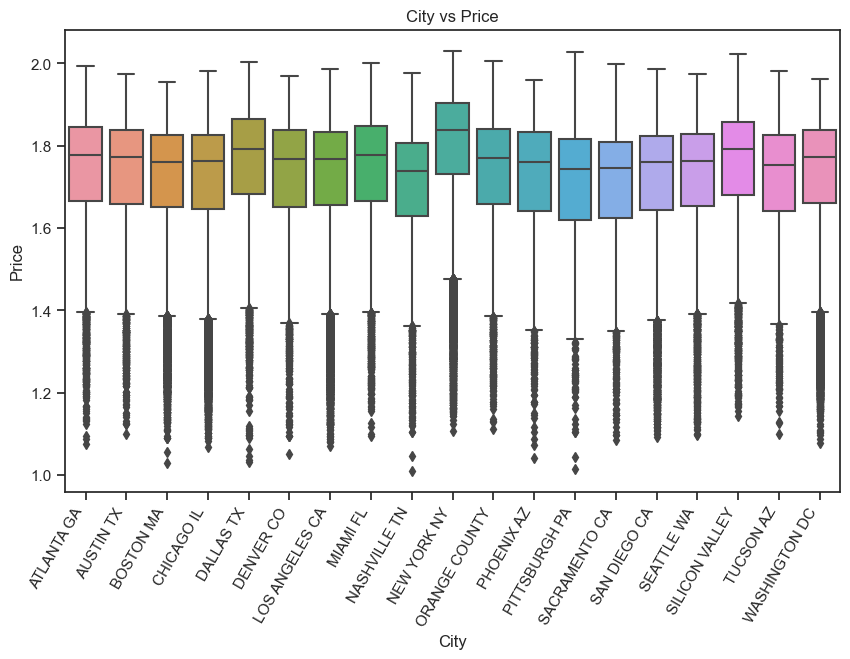

Text(0.5, 1.0, 'Company vs Price')

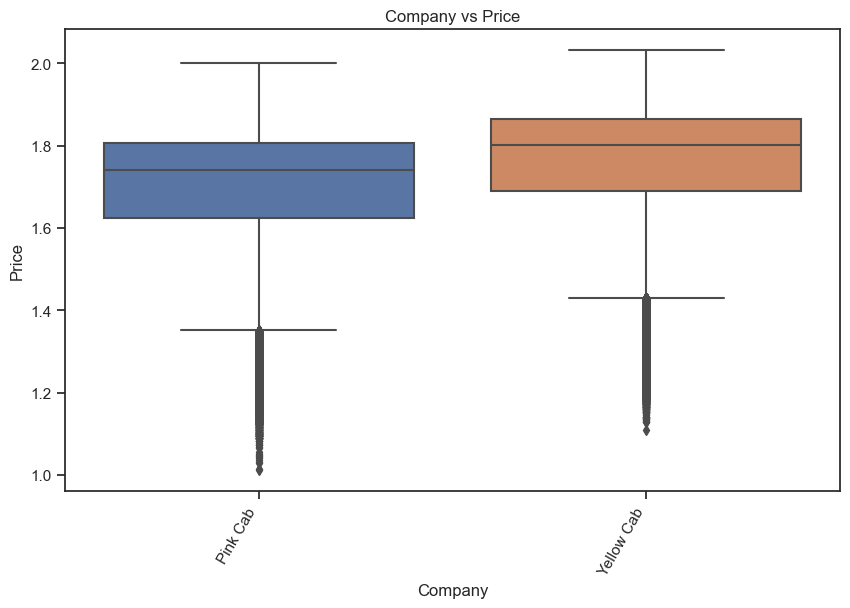

In [65]:
sns.set(style="ticks")

# Assuming "cab" is your DataFrame

plt.figure(figsize=(10, 6))
sns.boxplot(data=investcab, x='City', y='Price Charged', width=0.8)
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=60, ha='right')
plt.title('City vs Price')

plt.show()
# We see that New York has the highest median

## Company vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=investcab, x='Company', y='Price Charged', width=0.8)
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=60, ha='right')
plt.title('Company vs Price')

## there is no significant differences between pink and yellow cab


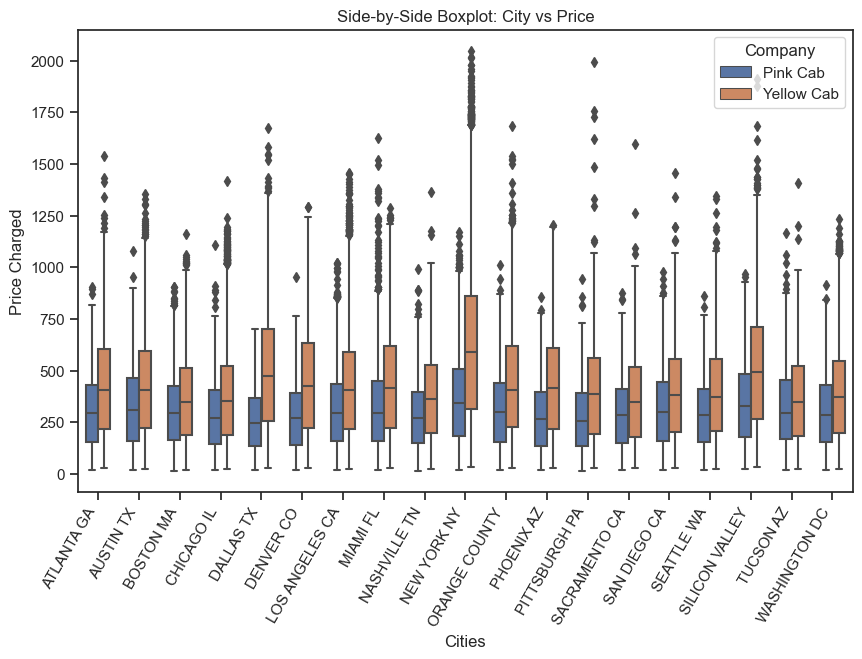

In [25]:
sns.set(style="ticks")

plt.figure(figsize=(10, 6))
sns.boxplot(data=investcab, x='City', y='Price Charged', hue='Company', width=0.6)
plt.xlabel('Cities')
plt.ylabel('Price Charged')
plt.title('Side-by-Side Boxplot: City vs Price')
plt.xticks(rotation=60, ha='right')

plt.legend(title='Company', loc='upper right')
plt.show()

Statistical Analysis

To be able to recommend which company will be profitable to invest for XYZ firm, I will be running 5 different hypotheses. These hypotheses are:

Hypothesis 1: Tested using Pearson Correlation

There is no correlation between the cost of trip and the distance traveled by a customer.

$H_o : \rho= 0$ 

There is a positive correlation between the cost of trip and the distance traveled by a customer.
$H_a : \rho > 0$


Hypothesis 2:

There is no difference in trip cost based on the payment mode chosen by the customer

$H_0 : \Pi_{card} - \Pi_{cash} = 0$

The difference in trip cost based on the payment mode chosen by the customer is greater than 0

$H_0 : \Pi_{card} - \Pi_{cash} > 0$


Hypothesis 3: Multiple regression

$H_0$ : There is a relationship between the cost of trip and demographic factors like gender and age


$H_a$ : There is a relationship between the cost of trip and demographic factors like gender and age


Hypothesis 4:

Is there any seasonality in number of customers using the cab services between any 2 cities?



Hypothesis 5:

There is no difference in means of price charged between pink and yellow cab

$H_0 : \mu_{pink} - \mu_{yellow} = 0$

There is a differnce in price charged between pink and yellow cab

$H_0 : \mu_{pink} - \mu_{yellow} \neq  0$


In [5]:
from scipy import stats

## Hypotheses 1
# data = investcab

correlation, p_value = stats.pearsonr(investcab['KM Travelled'], investcab['Cost of Trip'])
print("Correlation:", correlation)
print("P-value", p_value)








Correlation: 0.9818483823189857
P-value 0.0


In [6]:
import statsmodels
## Hypothesis 2:
# Perform the independent t-test
Payment_Mode_groups = investcab.groupby('Payment_Mode')
ttest_result = stats.ttest_ind(Payment_Mode_groups.get_group('Cash')['Cost of Trip'],
                         Payment_Mode_groups.get_group('Card')['Cost of Trip'])
print("T-test statistic:", ttest_result.statistic)
print("T-test p-value:", ttest_result.pvalue)

T-test statistic: -0.538475958565984
T-test p-value: 0.5902488319739334


In [7]:

## Hypothesis 3:
import statsmodels.api as sm
import pandas as pd

X = investcab[['Income (USD/Month)', 'Age', 'Gender']]
X = sm.add_constant(X)
y = investcab['Price Charged']

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          Price Charged   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     21.65
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           5.19e-14
Time:                        11:53:20   Log-Likelihood:            -2.5277e+06
No. Observations:              359392   AIC:                         5.055e+06
Df Residuals:                  359388   BIC:                         5.056e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                420.1470      1

In [14]:
investcab.info()
investcab.head()

investcab['Date of Travel'] = investcab['Date of Travel'].astype(float)
investcab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  float64
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Population          359392 non-null  object 
 8   Users               359392 non-null  object 
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  int64  
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 38.4+ MB
<class 'pandas.core.frame.

In [20]:


# change type
## Hypothesis 4:
# To test this hypothesis, we will use time series analysis techniques
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


investcab['Date of Travel'] = pd.to_datetime(investcab['Date of Travel'])

#investcab.set_index('Date of Travel', inplace = True)

## seasonal decomposition

#decompose = seasonal_decompose(investcab['Users'], model ='additive')

# Extract the trend, seasonal, and residual components
#trend = decompose.trend
#seasonal = decompose.seasonal
#residual = decompose.resid



# Plot the decomposition components
#plt.figure(figsize=(10, 8))
#plt.subplot(411)
#plt.plot(investcab['Users'], label='Original')
#plt.legend(loc='best')
#plt.subplot(412)
#plt.plot(trend, label='Trend')
#plt.legend(loc='best')
#plt.subplot(413)
#plt.plot(seasonal, label='Seasonality')
#plt.legend(loc='best')
#plt.subplot(414)
#plt.plot(residual, label='Residuals')
#plt.legend(loc='best')
#plt.tight_layout()
#plt.show()

KeyError: 'Date of Travel'

In [23]:
# Hypothesis 5:

# Extract the two groups from the dataset
group1 = investcab[investcab['Company'] == 'Pink Cab']['Price Charged']
group2 = investcab[investcab['Company'] == 'Yellow Cab']['Price Charged']

# Perform the independent samples t-test
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: -140.37224404354248
P-value: 0.0


Recommendations

1. Based on the side by sideboxplot, I will recommend the yellow cab company for investment

2. Based on hypothesis 1,there is a difference in price changed between pink and yellow cab companies although the correlation is 98%.